<h1 style="color:steelblue; font-family:Ewert; font-size:150%;" class="font-effect-3d">Code Library, Style, and Links</h1>

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d|ice|');
span {font-family:'Roboto'; color:black; text-shadow:5px 5px 5px #aaa;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:steelblue;}      
</style>

In [2]:
import numpy as np,pandas as pd
import os,ast,cv2,h5py,warnings
import tensorflow as tf,pylab as pl
from IPython.display import display,HTML
from IPython.core.magic import register_line_magic
warnings.filterwarnings('ignore')
pl.style.use('seaborn-whitegrid')
style_dict={'background-color':'gainsboro','color':'steelblue', 
            'border-color':'white','font-family':'Roboto'}
fpath='../input/quickdraw-doodle-recognition/train_simplified/'
os.listdir("../input")

['quickdraw-doodle-recognition']

<h1 style="color:steelblue; font-family:Ewert; font-size:150%;" class="font-effect-3d">Data Exploration</h1>

In [3]:
I=96 # image size in pixels
S=1 # current number of the label set {1,...,34} -> {1-10,...,331-340}
T=10 # number of labels in one set 
N=10000 # number of images with the same label in the training set
files=sorted(os.listdir(fpath))
labels=[el.replace(" ","_")[:-4] for el in files]
print(labels)

['The_Eiffel_Tower', 'The_Great_Wall_of_China', 'The_Mona_Lisa', 'airplane', 'alarm_clock', 'ambulance', 'angel', 'animal_migration', 'ant', 'anvil', 'apple', 'arm', 'asparagus', 'axe', 'backpack', 'banana', 'bandage', 'barn', 'baseball_bat', 'baseball', 'basket', 'basketball', 'bat', 'bathtub', 'beach', 'bear', 'beard', 'bed', 'bee', 'belt', 'bench', 'bicycle', 'binoculars', 'bird', 'birthday_cake', 'blackberry', 'blueberry', 'book', 'boomerang', 'bottlecap', 'bowtie', 'bracelet', 'brain', 'bread', 'bridge', 'broccoli', 'broom', 'bucket', 'bulldozer', 'bus', 'bush', 'butterfly', 'cactus', 'cake', 'calculator', 'calendar', 'camel', 'camera', 'camouflage', 'campfire', 'candle', 'cannon', 'canoe', 'car', 'carrot', 'castle', 'cat', 'ceiling_fan', 'cell_phone', 'cello', 'chair', 'chandelier', 'church', 'circle', 'clarinet', 'clock', 'cloud', 'coffee_cup', 'compass', 'computer', 'cookie', 'cooler', 'couch', 'cow', 'crab', 'crayon', 'crocodile', 'crown', 'cruise_ship', 'cup', 'diamond', 'dis

In [4]:
def display_drawing(data,n,S):
    for k in range(n):  
        pl.figure(figsize=(10,2))
        pl.suptitle(files[(S-1)*T+k])
        for i in range(5):
            picture=ast.literal_eval(data[labels[(S-1)*T+k]].values[i])
            for x,y in picture:
                pl.subplot(1,5,i+1)
                pl.plot(x,y,'-o',markersize=1,color='slategray')
                pl.xticks([]); pl.yticks([])
            pl.gca().invert_yaxis(); pl.axis('equal');
def get_image(data,lw=7,time_color=True):
    data=ast.literal_eval(data)
    image=np.zeros((280,280),np.uint8)
    for t,s in enumerate(data):
        for i in range(len(s[0])-1):
            color=255-min(t,10)*15 if time_color else 255
            _=cv2.line(image,(s[0][i]+10,s[1][i]+10),
                       (s[0][i+1]+10,s[1][i+1]+10),color,lw) 
    return cv2.resize(image,(I,I))

In [5]:
nn=np.random.randint(0,T*N,3)
nn

array([36120, 94295, 26298])

<h1 style="color:steelblue; font-family:Ewert; font-size:150%;" class="font-effect-3d">Data Compression</h1>

In [6]:
@register_line_magic
def data_compression(s):
    S=int(s)
    data=pd.DataFrame(index=range(N),
                      columns=labels[(S-1)*T:S*T])
    for i in range((S-1)*T,S*T):
        data[labels[i]]=\
        pd.read_csv(fpath+files[i],
                    index_col='key_id').drawing.values[:N]
    display(data.head(3).T.style.set_properties(**style_dict))
    display_drawing(data,5,S)
    images=[]
    for label in labels[(S-1)*T:S*T]:
        images.extend([get_image(data[label].iloc[i]) 
                       for i in range(N)])
    images=np.array(images,dtype=np.uint8)
    targets=np.array([[]+N*[k] for k in range((S-1)*T,S*T)],
                     dtype=np.uint8).reshape(N*T)
    nn=np.random.randint(0,T*N,3)
    ll=labels[targets[nn[0]]]+', '+labels[targets[nn[1]]]+\
   ', '+labels[targets[nn[2]]]
    pl.figure(figsize=(10,2))
    pl.subplot(1,3,1); pl.imshow(images[nn[0]])
    pl.subplot(1,3,2); pl.imshow(images[nn[1]])
    pl.subplot(1,3,3); pl.imshow(images[nn[2]])
    pl.suptitle('Key Points to Lines: %s'%ll)
    pl.show()
    h5f='QuickDrawImages%d.h5'%S
    with h5py.File(h5f,'w') as f:
        f.create_dataset('images',data=images)
        f.create_dataset('targets',data=targets)
        f.close()
    del data,images,targets

,0,1,2
The_Eiffel_Tower,"[[[0, 22, 37, 64, 255], [218, 220, 227, 228, 211]], [[76, 95, 135, 141, 150, 159, 166, 180, 186, 201], [220, 138, 31, 0, 63, 79, 117, 150, 191, 224]], [[94, 104, 111, 119, 127, 141, 143, 142, 180, 191], [212, 167, 149, 80, 59, 41, 30, 134, 202, 232]], [[109, 127, 137, 147, 150, 162, 172, 185], [122, 120, 104, 97, 99, 124, 128, 128]], [[75, 130, 158], [162, 159, 150]]]","[[[47, 47, 36, 26, 0, 10, 23, 46, 46, 63, 68, 105, 107, 112, 134, 152, 170, 151, 125, 101, 82, 74, 70, 60], [18, 98, 167, 201, 255, 248, 245, 248, 235, 183, 181, 187, 202, 216, 244, 252, 239, 180, 140, 93, 42, 1, 1, 21]], [[76, 68, 78, 101, 102, 93], [71, 131, 135, 136, 126, 101]]]","[[[184, 115, 67, 57, 36, 18], [251, 103, 12, 109, 193, 247]], [[145, 154, 150, 48, 24], [180, 176, 175, 178, 173]], [[55, 50, 38, 0, 28, 31, 60, 66, 71], [128, 152, 179, 253, 254, 247, 114, 26, 0]], [[72, 76, 81, 83, 86, 99, 93, 86], [26, 35, 71, 250, 255, 254, 189, 5]], [[67, 74, 97, 172], [12, 16, 49, 194]]]"
The_Great_Wall_of_China,"[[[10, 41, 126, 153, 195, 219, 241], [49, 42, 47, 35, 8, 0, 0]], [[244, 244, 255], [0, 38, 89]], [[0, 10, 11], [61, 94, 115]]]","[[[0, 88, 115, 146, 156, 164, 173, 184, 216, 239, 250, 252], [33, 39, 30, 8, 7, 7, 15, 31, 18, 1, 1, 8]], [[255, 237, 178, 152, 121, 81], [31, 32, 63, 51, 64, 70]]]","[[[5, 0, 8, 22, 44, 73, 104, 130, 152, 164, 166, 158], [139, 37, 12, 0, 0, 14, 42, 81, 126, 174, 217, 255]]]"
The_Mona_Lisa,"[[[101, 98, 91, 83, 80, 80, 82, 92, 104, 117, 139, 154, 169, 180, 181, 177], [35, 33, 34, 44, 58, 97, 109, 130, 142, 149, 146, 135, 114, 90, 77, 50]], [[91, 86, 94, 91, 83, 77, 68], [104, 116, 154, 179, 196, 226, 234]], [[4, 0, 0, 12, 5, 13, 26, 40, 115, 151, 165, 199, 233, 238, 236, 245, 241, 228], [222, 216, 208, 162, 110, 75, 40, 24, 0, 8, 18, 62, 93, 110, 146, 174, 195, 233]], [[168, 173, 200, 211, 203], [120, 157, 183, 203, 255]], [[3, 59, 89], [212, 232, 235]], [[208, 222, 245], [235, 235, 228]], [[97, 135, 154, 169], [36, 35, 42, 56]], [[112, 113, 120, 144], [104, 107, 109, 110]], [[114, 112], [68, 76]], [[136, 133], [68, 76]]]","[[[7, 9, 1, 0, 31, 49, 98, 222, 223, 236, 237, 234, 146, 60, 6, 5], [88, 117, 189, 233, 247, 251, 255, 254, 172, 80, 40, 1, 3, 12, 12, 88]], [[123, 111, 94, 94, 98, 111, 125, 137, 145, 147, 136, 127], [43, 54, 88, 105, 118, 128, 129, 122, 112, 73, 53, 49]], [[107, 108], [71, 89]], [[123, 124], [61, 83]], [[112, 130], [103, 103]], [[122, 109, 99, 82, 70, 58, 49, 50, 68], [43, 53, 72, 149, 158, 157, 151, 143, 124]], [[124, 137, 155, 161, 161, 174, 185, 181], [50, 54, 71, 87, 138, 148, 149, 144]]]","[[[12, 8, 8, 13, 29], [3, 66, 134, 176, 238]], [[0, 31, 148, 204, 206, 195, 192, 134, 17], [0, 5, 5, 11, 15, 34, 251, 255, 241]], [[101, 99, 98, 103, 108, 114, 119, 119, 114, 104], [60, 66, 97, 106, 109, 107, 96, 55, 50, 68]], [[86, 101, 117, 125, 134, 136], [42, 33, 31, 44, 88, 166]], [[91, 86, 86], [45, 77, 105]], [[101, 104, 94, 64, 74, 85], [108, 156, 171, 191, 190, 184]], [[121, 120, 130, 129, 123, 133], [112, 152, 198, 229, 239, 245]]]"
airplane,"[[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, 30, 6, 1, 2, 66, 98, 253, 254, 246, 182, 165], [140, 194, 227, 232, 229, 229, 206, 124, 123, 149, 157, 159, 153, 110, 82, 77, 74, 109, 121, 127, 120]], [[207, 207, 210, 221, 238], [74, 103, 114, 128, 135]], [[119, 107, 76, 70, 49, 39, 60, 93], [72, 41, 3, 0, 1, 5, 38, 70]]]","[[[2, 14, 34, 126], [57, 45, 38, 47]], [[41, 46, 53, 67, 83, 84, 72, 69], [62, 102, 118, 118, 104, 93, 82, 74]], [[15, 25, 26, 17], [54, 51, 54, 54]], [[48, 55, 61, 49], [53, 50, 52, 52]], [[75, 87, 87, 69], [53, 54, 56, 55]], [[122, 140, 138, 102, 111, 155, 162, 167, 162, 145, 124, 75], [48, 42, 34, 23, 20, 27, 30, 44, 65, 78, 87, 89]], [[46, 67, 74, 80, 84, 86, 75], [36, 13, 8, 9, 13, 29, 46]], [[0, 7, 50], [56, 61, 69]], [[201, 235], [14, 0]], [[221, 251, 255], [50, 59, 64]], [[232, 249], [94, 102]]]","[[[90, 88, 95, 104, 112, 122], [65, 31, 12, 0, 11, 65]], [[96, 93, 99, 105, 116, 121, 124, 120], [97, 129, 146, 152, 149

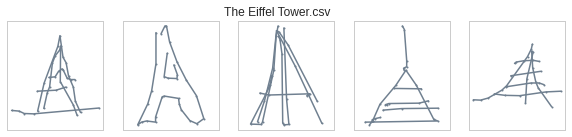

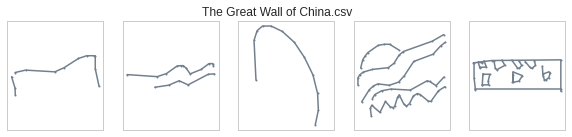

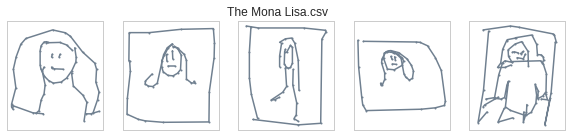

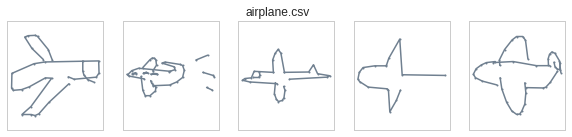

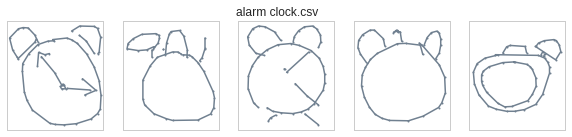

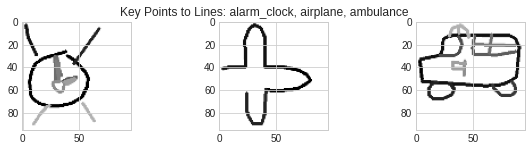

In [7]:
%data_compression 1

,0,1,2
apple,"[[[255, 255], [0, 0]], [[255, 255], [0, 0]], [[255, 255], [0, 0]], [[255, 254], [0, 1]], [[131, 124, 114, 69, 37, 10, 0, 0, 5, 16, 31, 50, 68, 86, 101, 115, 126, 135, 137, 135, 122, 106], [50, 39, 39, 59, 89, 127, 172, 194, 215, 233, 244, 249, 249, 241, 225, 203, 174, 143, 114, 88, 65, 45]], [[84, 77, 81, 88, 99, 122, 138, 161, 180], [97, 85, 52, 34, 18, 4, 1, 2, 12]]]","[[[95, 79, 68, 31, 17, 9, 1, 0, 4, 54, 103, 130, 168, 190, 204, 219, 228, 222, 210, 200, 194, 197, 203, 192, 189, 190, 209, 207, 197, 179, 107, 100], [62, 50, 49, 74, 91, 113, 163, 220, 226, 249, 255, 255, 244, 231, 215, 187, 152, 151, 160, 160, 156, 140, 137, 134, 115, 109, 88, 82, 71, 63, 62, 65]], [[100, 100, 104, 110, 115, 115, 108, 107], [58, 17, 1, 0, 12, 22, 44, 64]]]","[[[121, 107, 45, 17, 1, 0, 4, 21, 58, 118, 173, 197, 209, 224, 244, 254, 254, 209, 164, 124], [47, 57, 56, 75, 93, 114, 123, 140, 162, 187, 196, 187, 177, 164, 136, 115, 101, 83, 71, 43]], [[123, 126], [43, 0]]]"
arm,"[[[6, 13, 41, 56, 66, 95, 118, 129, 152, 190, 199, 181, 180, 190, 204, 209, 235, 234, 253, 255, 225, 199, 181, 163, 144, 120, 74, 0], [109, 112, 92, 87, 88, 110, 110, 107, 91, 37, 20, 18, 16, 6, 2, 12, 0, 20, 15, 21, 59, 118, 141, 153, 159, 159, 152, 151]]]","[[[27, 35, 64, 93, 116, 175, 226], [2, 0, 9, 24, 41, 96, 164]], [[22, 14, 0, 7, 25, 65, 141, 160, 175, 220], [6, 10, 37, 43, 76, 121, 183, 195, 195, 164]], [[210, 235, 238, 240, 236, 227, 233, 235, 233, 220, 204, 206, 212, 216, 215, 210, 200, 183, 176, 179, 160, 151, 147, 146, 161], [156, 154, 156, 164, 188, 194, 195, 199, 222, 229, 228, 224, 225, 233, 245, 252, 255, 248, 239, 229, 248, 252, 250, 238, 203]]]","[[[119, 114, 86, 48, 38, 35, 34, 42, 42, 49, 50, 60, 64, 90, 110, 122, 139, 148, 175, 179, 178], [104, 150, 166, 181, 182, 188, 193, 204, 212, 211, 216, 219, 225, 223, 213, 198, 195, 188, 188, 171, 107]], [[53, 40, 20, 10, 10, 14, 20, 33, 14, 12, 15, 60, 70, 73, 66, 48, 42, 45, 86, 120, 170, 180, 185, 184, 174, 172, 157, 92, 86, 88, 111, 108, 96, 76, 55, 30, 12, 0, 11, 26, 26, 34], [180, 188, 191, 216, 222, 225, 225, 217, 229, 232, 236, 238, 235, 229, 231, 245, 253, 255, 251, 237, 208, 194, 165, 142, 107, 82, 74, 55, 46, 37, 23, 16, 9, 1, 0, 10, 23, 47, 56, 61, 104, 156]]]"
asparagus,"[[[0, 51, 62, 100], [255, 129, 111, 67]], [[8, 25, 82, 98, 113], [254, 233, 146, 114, 95]], [[101, 99, 117, 113, 126, 142, 164, 162, 145, 135, 151, 142, 128], [72, 45, 19, 52, 28, 14, 0, 8, 35, 59, 55, 70, 81]]]","[[[1, 0, 10, 35, 36, 41, 44, 49, 56, 58, 62, 72, 74, 70, 82, 85, 56, 47, 45, 36, 27, 1], [255, 229, 166, 80, 27, 25, 37, 9, 1, 33, 15, 0, 8, 26, 16, 21, 56, 128, 192, 222, 237, 247]], [[36, 58], [72, 74]], [[23, 43], [118, 116]], [[27, 50], [94, 93]]]","[[[12, 30, 67, 110, 103, 103, 107, 113, 112, 114, 126, 132, 134, 131, 135, 154, 172, 155, 193, 197, 196, 160, 174, 146, 126, 117, 87, 67, 53, 44, 30, 4], [255, 219, 128, 65, 44, 20, 7, 1, 27, 33, 13, 9, 21, 38, 39, 15, 0, 26, 22, 23, 27, 52, 47, 55, 74, 98, 136, 177, 241, 247, 251, 252]], [[47, 39, 58], [234, 230, 226]], [[66, 39, 39, 57], [223, 221, 219, 210]], [[64, 49, 53], [201, 192, 186]], [[64, 60, 81, 61, 59, 94, 91, 81], [168, 157, 145, 142, 139, 119, 117, 116]]]"
axe,"[[[2, 38, 71, 108, 128, 139], [10, 24, 31, 22, 14, 4]], [[0, 13, 13, 3, 14, 50, 74, 143], [20, 70, 98, 124, 122, 103, 96, 95]], [[134, 133, 144, 144], [0, 84, 207, 253]], [[131, 148, 154, 153, 176, 176, 171, 154], [8, 4, 6, 79, 236, 249, 253, 255]]]","[[[54, 37, 7, 5, 12, 0, 7, 34, 52, 56, 52, 42, 38], [66, 49, 8, 11, 63, 105, 105, 89, 84, 88, 149, 205, 255]], [[59, 62, 88, 95, 97], [66, 13, 1, 1, 33]]]","[[[146, 145, 154, 154, 197, 196, 189, 191, 178, 172, 148], [83, 121, 194, 254, 254, 228, 194, 143, 80, 78, 82]], [[176, 169, 153, 57, 18, 0, 97, 158], [75, 0, 12, 35, 55, 60, 68, 82]], [[0, 18, 28, 69, 151], [62, 93, 102, 100, 87]]]"
backpack,"[[[96, 67, 48, 46, 53, 69, 87, 132, 164, 191, 204, 208, 217, 228, 231, 223, 211, 194, 127, 97, 79, 76], [17, 60, 107, 169, 201, 214, 222, 229, 23

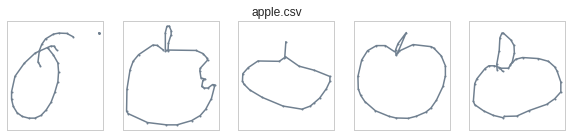

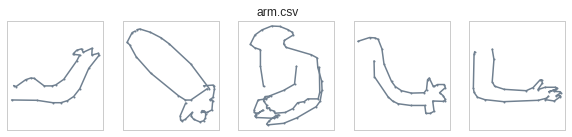

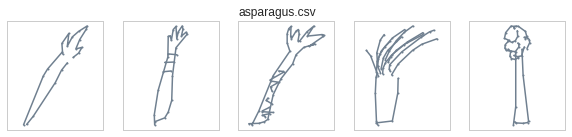

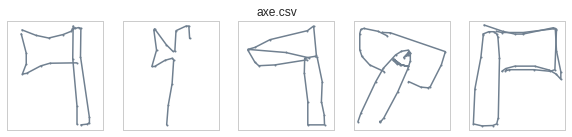

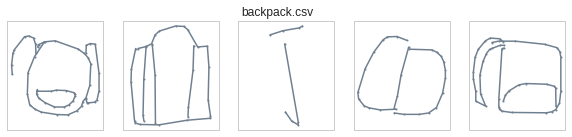

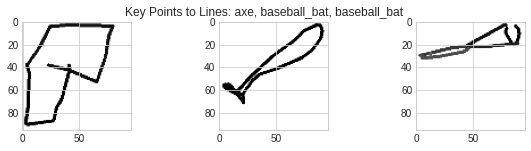

In [8]:
%data_compression 2

,0,1,2
basket,"[[[3, 40, 185, 191, 196, 203, 249], [14, 150, 151, 148, 107, 85, 11]], [[0, 59, 141, 216, 255], [15, 11, 10, 12, 16]], [[22, 47, 53], [20, 131, 146]], [[65, 83, 95, 102], [6, 77, 144, 159]], [[141, 143, 151, 159], [0, 87, 139, 158]], [[214, 216, 206], [11, 49, 120]], [[22, 144], [63, 62]]]","[[[180, 131, 96, 49, 7, 3, 6, 12, 42, 64, 92, 165, 180, 198, 219, 219, 212, 200], [14, 0, 0, 20, 46, 56, 67, 72, 90, 97, 101, 101, 98, 87, 68, 46, 33, 21]], [[0, 10, 33, 47, 54, 76, 119, 181, 201, 204], [61, 93, 142, 186, 195, 205, 212, 212, 134, 57]], [[30, 91, 165, 206, 210, 210], [122, 147, 168, 171, 167, 159]], [[47, 48, 63, 89, 159, 231], [157, 162, 170, 177, 192, 198]], [[46, 56, 73, 73], [107, 120, 193, 183]], [[84, 88, 98], [118, 125, 203]], [[130, 131, 123], [117, 166, 204]], [[170, 170, 160, 159], [99, 123, 159, 196]], [[180, 181, 150], [106, 132, 255]]]","[[[255, 241, 161, 45, 22, 15, 11, 8, 12, 23, 71, 140, 180, 224, 232, 241, 249, 253], [102, 100, 105, 91, 91, 95, 104, 182, 187, 191, 196, 197, 193, 193, 182, 125, 89, 87]], [[183, 188, 188, 185, 176, 165, 137, 112, 93, 87, 73, 72, 74, 77], [106, 64, 44, 35, 21, 12, 0, 3, 19, 28, 63, 88, 97, 98]], [[131, 129, 45, 42, 41], [97, 51, 48, 53, 88]], [[126, 169, 215, 217, 215, 211], [50, 47, 50, 73, 89, 92]], [[241, 207, 134, 52, 0], [123, 119, 118, 110, 110]], [[232, 224, 168], [147, 155, 193]], [[177, 152, 88], [100, 131, 191]], [[87, 75, 8], [100, 103, 180]], [[24, 56, 92], [97, 137, 200]], [[117, 144, 179], [103, 137, 198]]]"
basketball,"[[[131, 122, 104, 72, 21, 13, 2, 0, 5, 18, 43, 82, 173, 207, 228, 238, 253, 253, 210, 175, 108], [10, 5, 3, 18, 61, 70, 99, 159, 177, 204, 215, 222, 225, 220, 214, 205, 155, 94, 21, 10, 6]], [[41, 67, 76], [53, 69, 225]], [[231, 223, 200, 191, 193, 212], [64, 67, 98, 126, 167, 206]], [[124, 121, 112, 113], [11, 80, 115, 207]], [[145, 156, 161, 164, 164, 150], [0, 18, 38, 96, 133, 204]]]","[[[74, 54, 43, 26, 7, 1, 0, 4, 13, 32, 53, 86, 118, 153, 179, 209, 222, 231, 234, 225, 207, 188, 154, 73, 43, 36, 32], [0, 1, 7, 29, 66, 86, 111, 126, 139, 153, 163, 172, 177, 177, 173, 155, 140, 120, 88, 57, 36, 26, 16, 8, 13, 22, 34]], [[70, 67, 70, 86, 107, 151, 208, 229, 250, 255, 252], [5, 33, 69, 101, 118, 132, 132, 125, 113, 107, 101]], [[17, 21, 54, 75, 87, 87], [47, 58, 80, 105, 135, 169]]]","[[[211, 201, 179, 142, 109, 85, 51, 20, 10, 1, 0, 4, 13, 33, 53, 72, 91, 152, 207, 228, 239, 251, 255, 251, 245, 232, 217], [23, 14, 4, 0, 8, 22, 54, 98, 117, 150, 170, 190, 208, 228, 240, 242, 239, 215, 186, 168, 156, 131, 108, 71, 57, 43, 37]], [[144, 138, 114, 96], [15, 45, 131, 227]], [[51, 90, 119, 197, 224, 250], [70, 78, 79, 68, 58, 54]], [[18, 38, 57, 83, 106, 200, 249], [141, 126, 117, 112, 112, 132, 159]], [[16, 61, 110, 142, 192], [195, 197, 194, 189, 175]]]"
bat,"[[[111, 89, 79, 77, 82, 89, 103, 113, 126, 125, 104], [53, 106, 147, 174, 179, 180, 172, 156, 114, 54, 55]], [[103, 103, 111, 126, 137, 137, 127], [53, 17, 1, 2, 14, 25, 44]], [[113, 98, 45, 41, 40, 45, 27, 22, 21, 25, 20, 2, 0, 8, 42, 61, 73], [55, 48, 12, 10, 13, 53, 54, 61, 93, 125, 126, 115, 123, 136, 165, 167, 158]], [[132, 143, 158, 171, 208, 215, 219, 248, 251, 255, 254, 242, 227, 233, 233, 222, 211, 187, 144, 125, 111, 107], [61, 56, 37, 26, 12, 65, 67, 65, 67, 82, 102, 130, 153, 156, 160, 173, 180, 188, 189, 189, 186, 181]]]","[[[95, 95], [40, 73]], [[123, 124], [39, 65]], [[125, 67, 62, 52, 52, 56, 73, 106, 142, 152, 158, 158, 148, 136, 126], [5, 6, 11, 34, 55, 69, 85, 98, 98, 88, 70, 33, 13, 3, 0]], [[106, 115], [77, 77]], [[120, 122, 148, 180, 210, 223, 239, 245, 255, 254, 249, 238, 225, 204, 142, 128], [99, 177, 179, 159, 123, 94, 46, 51, 89, 124, 136, 154, 166, 174, 177, 173]], [[116, 29, 9, 4, 0, 1, 27, 45, 100, 122, 138], [151, 131, 101, 100, 113, 126, 165, 175, 185, 184, 169]], [[120, 113, 100, 90], [175, 192, 205, 209]], [[153, 158, 171], [184, 197, 209]]]","[[[88, 99, 104, 106, 128, 133, 144, 142, 146, 172, 213, 225, 243, 249, 253, 255, 254, 244, 234, 228, 202, 

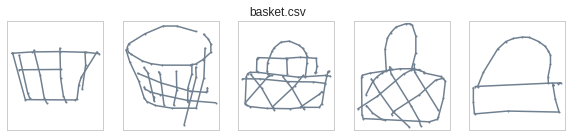

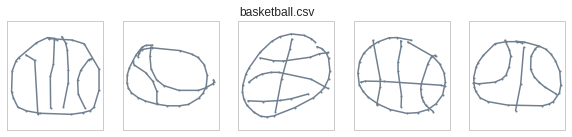

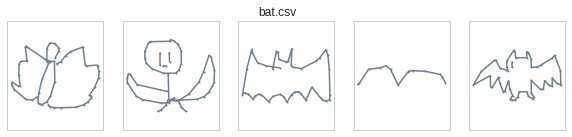

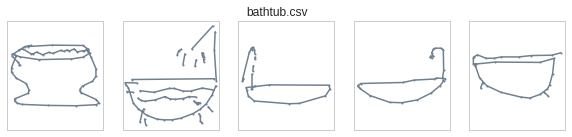

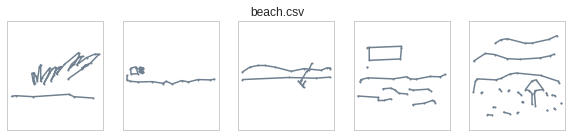

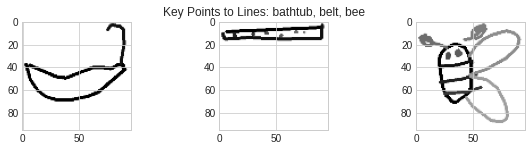

In [9]:
%data_compression 3

,0,1,2
bench,"[[[122, 102, 56, 45, 66], [0, 3, 3, 29, 22]], [[112, 121, 167, 222, 224], [4, 2, 2, 7, 44]], [[59, 42, 27, 19, 12, 13, 24], [4, 41, 34, 34, 39, 49, 52]], [[229, 233, 254, 253, 239], [38, 34, 36, 44, 51]], [[39, 148, 225], [47, 60, 61]], [[40, 16, 11, 16], [49, 66, 70, 71]], [[232, 192, 160, 91, 41, 11, 2, 0, 5], [64, 91, 90, 77, 76, 70, 99, 119, 119]], [[187, 186, 189], [91, 124, 120]], [[237, 238, 232], [58, 93, 104]], [[59, 54], [78, 94]]]","[[[2, 1, 11, 101, 234, 250, 255], [70, 43, 16, 6, 0, 24, 54]], [[7, 37, 104, 252], [32, 26, 22, 29]]]","[[[0, 29, 99, 148, 223, 253], [6, 0, 0, 13, 14, 5]], [[253, 255], [5, 56]]]"
bicycle,"[[[1, 0, 5, 26, 52, 77, 86, 84, 79, 70, 46, 27, 15, 5, 4, 8], [145, 153, 159, 163, 152, 134, 101, 77, 71, 66, 67, 79, 95, 132, 142, 143]], [[51, 51, 43], [66, 94, 154]], [[10, 47, 84], [118, 108, 107]], [[191, 185, 184, 189, 200, 215, 235, 245, 251, 251, 245, 235, 224, 207, 187], [91, 107, 133, 147, 157, 157, 144, 134, 120, 78, 69, 66, 66, 75, 119]], [[192, 255, 255], [111, 110, 108]], [[226, 225], [59, 170]], [[54, 63, 76, 107, 129, 207, 226, 229, 229], [61, 47, 35, 28, 35, 37, 42, 46, 68]], [[188, 186], [37, 0]]]","[[[61, 51, 51, 53, 59, 77, 99, 106, 108, 92, 84, 70, 52, 47], [61, 88, 105, 112, 116, 119, 118, 106, 88, 61, 57, 57, 66, 74]], [[226, 190, 192, 207, 233, 244, 253, 255, 252, 233, 222], [45, 78, 95, 104, 109, 104, 93, 76, 69, 40, 38]], [[14, 1, 1], [7, 26, 21]], [[11, 31, 40, 67, 90], [4, 8, 15, 4, 2]], [[39, 48, 50, 56, 58, 57, 62, 90, 125, 167, 193, 195, 178, 129, 99, 120, 178, 213], [13, 34, 36, 34, 36, 53, 62, 63, 56, 38, 36, 44, 53, 63, 64, 70, 64, 66]], [[222, 209, 207, 210, 221, 234, 223], [63, 70, 86, 89, 90, 85, 60]], [[65, 65, 73, 78, 85, 89, 83, 68], [85, 104, 111, 110, 102, 89, 85, 89]], [[89, 92, 100, 95, 88, 50, 33], [0, 7, 11, 4, 3, 3, 10]]]","[[[92, 66, 46, 9, 12, 45, 52, 99, 118, 119, 91, 55], [108, 112, 123, 167, 212, 224, 222, 173, 141, 125, 110, 134]], [[232, 186, 170, 180, 215, 248, 255, 220, 201], [116, 157, 214, 241, 232, 191, 129, 100, 111]], [[97, 217, 254], [109, 91, 100]], [[92, 69, 22, 4, 13, 37, 68, 84, 43, 0, 0], [105, 57, 3, 17, 35, 41, 28, 6, 0, 18, 26]]]"
binoculars,"[[[205, 194, 182, 175, 175, 183, 196, 231, 243, 251, 255, 255, 250, 244, 220], [89, 86, 102, 127, 151, 160, 168, 169, 161, 150, 138, 115, 99, 90, 83]], [[82, 76, 61, 58, 59, 68, 80, 103, 118, 133, 141, 144, 143, 135, 100], [97, 97, 120, 127, 149, 162, 174, 182, 182, 170, 158, 135, 128, 117, 98]], [[149, 58], [110, 49]], [[61, 27, 10, 10], [146, 114, 93, 88]], [[239, 196, 135], [78, 59, 22]], [[179, 162, 128, 92], [134, 124, 94, 52]], [[128, 115, 95, 87, 82, 93, 96], [17, 4, 1, 13, 30, 38, 46]], [[56, 42, 16, 0], [43, 34, 32, 52]]]","[[[45, 31, 12, 0, 1, 5, 21, 37, 56, 72, 97, 96, 79, 57, 37], [100, 99, 106, 141, 156, 164, 180, 187, 187, 182, 133, 117, 103, 95, 99]], [[162, 151, 144, 141, 163, 193, 206, 211, 210, 197, 183, 161, 154], [104, 105, 120, 154, 177, 192, 190, 175, 158, 122, 102, 100, 104]], [[55, 58, 69, 94, 100], [91, 79, 58, 23, 3]], [[197, 200, 213, 242, 255], [113, 100, 83, 57, 36]], [[101, 126, 166, 225, 242], [0, 85, 73, 36, 30]], [[97, 97], [138, 138]]]","[[[17, 15, 20, 38, 51, 71, 84, 86, 80, 62, 36, 22, 1, 0, 5], [99, 126, 137, 153, 157, 157, 144, 103, 88, 73, 71, 80, 106, 115, 123]], [[192, 168, 154, 147, 148, 153, 160, 182, 194, 205, 219, 221, 216, 199, 188], [162, 160, 149, 124, 98, 87, 80, 75, 75, 81, 99, 121, 133, 148, 151]], [[34, 87, 104, 127, 129, 124, 107, 79], [70, 30, 40, 69, 86, 96, 118, 145]], [[155, 168, 198, 219, 241, 252, 254, 206], [89, 68, 33, 38, 55, 73, 100, 146]], [[112, 146], [46, 0]], [[148, 148], [1, 1]]]"
bird,"[[[0, 11, 23, 50, 72, 96, 97, 132, 158, 224, 255], [22, 9, 2, 0, 26, 45, 71, 40, 27, 10, 9]]]","[[[65, 194, 221, 240, 250, 255, 251, 242, 227, 210, 173, 154, 133, 86, 58, 55], [102, 104, 111, 120, 130, 151, 161, 173, 181, 184, 186, 181, 170, 138, 106, 94]], [[211, 216], [133, 138]], [[208, 205, 205], [154, 164, 159]], [[94, 82, 74,

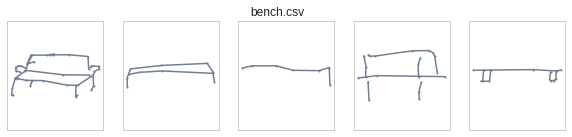

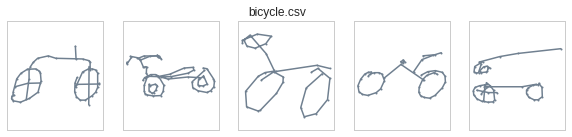

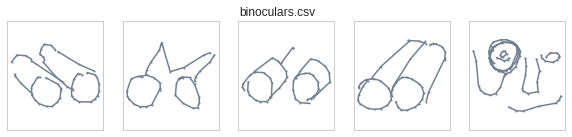

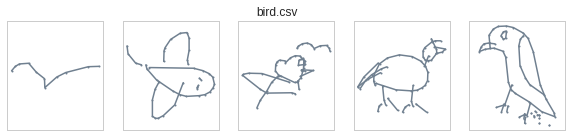

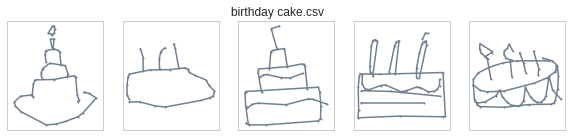

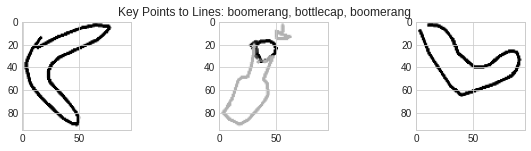

In [10]:
%data_compression 4

,0,1,2
bowtie,"[[[91, 92], [71, 140]], [[94, 118, 150, 176, 181, 180, 128, 98], [72, 63, 61, 61, 70, 135, 137, 134]], [[84, 26, 5, 0, 9, 51, 93], [70, 14, 0, 166, 166, 145, 115]], [[176, 185, 243, 247, 255, 255, 245, 194], [60, 48, 3, 11, 68, 159, 160, 130]], [[44, 71], [80, 84]]]","[[[131, 190, 167, 123, 114, 134], [36, 106, 109, 101, 46, 35]], [[118, 61, 31, 14, 3, 0, 2, 16, 34, 58, 130], [41, 14, 14, 31, 57, 78, 122, 141, 146, 139, 104]], [[138, 191], [42, 111]], [[133, 158, 191, 223, 234, 250, 255, 253, 243, 231, 190], [37, 18, 3, 0, 10, 40, 62, 79, 92, 99, 104]]]","[[[5, 21, 62, 122, 137, 147, 155, 165, 164, 153, 138, 127, 129], [32, 36, 63, 94, 78, 75, 77, 93, 117, 134, 133, 120, 95]], [[127, 13, 5, 1, 4], [128, 157, 143, 118, 35]], [[166, 201, 241, 247, 255, 242, 204, 157], [78, 45, 0, 32, 160, 158, 144, 114]]]"
bracelet,"[[[1, 55, 102, 166, 182, 207, 216, 224, 227, 224, 220, 202, 189, 163, 139, 113, 86, 60, 37, 27, 13, 6, 0, 0, 4], [63, 35, 17, 0, 0, 11, 23, 42, 64, 109, 129, 173, 197, 231, 248, 255, 253, 242, 218, 202, 172, 145, 100, 87, 79]], [[108, 67, 36, 29, 24, 24, 29, 46, 75, 105, 120, 141, 155, 166, 180, 180, 175, 150, 132, 112], [219, 196, 162, 147, 126, 111, 89, 67, 42, 26, 23, 23, 29, 43, 78, 102, 121, 179, 197, 208]]]","[[[255, 233, 202, 185, 141, 114, 87, 61, 47, 26, 11, 1, 0, 3, 23, 43, 65, 96, 152, 181, 205, 250, 255, 255, 242], [68, 35, 14, 7, 0, 0, 6, 20, 30, 52, 76, 112, 145, 156, 178, 190, 197, 202, 204, 195, 177, 111, 93, 77, 47]], [[223, 220, 205, 181, 154, 119, 92, 64, 51, 50, 62, 86, 120, 160, 180, 216, 222, 220], [74, 65, 48, 36, 32, 33, 43, 62, 87, 115, 134, 148, 158, 157, 143, 98, 78, 50]], [[136, 138, 146, 157, 162, 162, 155, 143, 115, 110, 107], [177, 169, 159, 158, 169, 194, 203, 206, 193, 185, 174]]]","[[[51, 76, 98, 118, 121, 92, 77, 73], [16, 51, 51, 32, 0, 0, 19, 35]], [[153, 140, 140, 163, 179, 182, 178, 160, 156], [0, 19, 51, 60, 47, 22, 3, 3, 26]], [[194, 185, 207, 223, 233, 207, 188, 188, 191], [29, 70, 83, 73, 48, 39, 57, 76, 83]], [[239, 226, 227, 242, 255, 232, 223, 223, 245], [70, 93, 108, 111, 92, 84, 99, 133, 143]], [[239, 230, 226, 245, 249, 230, 220, 220, 236], [150, 169, 184, 182, 163, 156, 185, 204, 217]], [[57, 57, 73, 79, 61, 61], [35, 51, 60, 45, 41, 73]], [[35, 16, 0, 0, 22, 38, 19, 19, 29], [70, 76, 99, 115, 118, 102, 99, 118, 128]], [[51, 63, 48, 32, 32, 44, 70, 83], [188, 172, 163, 163, 195, 210, 210, 204]], [[128, 115, 108, 108, 134, 147, 147, 124, 115, 140, 150], [185, 204, 226, 245, 251, 226, 210, 198, 217, 226, 226]], [[188, 175, 175, 201, 220, 207, 191, 169, 163], [182, 204, 219, 229, 189, 172, 172, 194, 214]]]"
brain,"[[[35, 38, 46, 62, 80, 94, 99, 104, 110, 128, 149, 167, 179, 181, 175, 160, 183, 199, 211, 212, 197, 181, 168, 151, 140, 132, 140, 150, 154, 155, 146, 124, 114, 87, 75, 60, 48, 48, 58, 64, 69, 68, 62, 49, 42, 22, 9, 4, 8, 17, 25, 27, 26, 20, 15, 7, 2, 0, 4, 11, 22, 41], [55, 36, 21, 7, 0, 2, 6, 14, 35, 20, 13, 20, 36, 60, 72, 85, 87, 99, 118, 139, 173, 187, 192, 191, 188, 180, 177, 185, 194, 212, 232, 250, 253, 254, 251, 241, 220, 203, 179, 174, 176, 187, 193, 198, 196, 178, 157, 140, 116, 105, 109, 115, 124, 132, 133, 128, 117, 101, 83, 70, 58, 52]], [[107, 53, 40, 44, 69], [26, 61, 81, 115, 167]], [[122, 88, 77, 71, 75], [36, 84, 110, 135, 194]], [[150, 118, 75], [26, 113, 196]], [[37, 63, 111, 162, 198], [55, 74, 100, 134, 164]], [[11, 23, 103, 143, 171], [105, 108, 144, 168, 193]], [[48, 73, 100, 164], [183, 187, 186, 168]]]","[[[74, 67, 60, 57, 56, 62, 62, 55, 52, 43, 43, 51, 47, 46, 57, 64, 74, 90, 93, 95, 86, 84, 85, 94, 113, 121, 122, 121, 115, 133, 144, 149, 149, 136, 148, 161, 160, 141, 142, 155, 168, 169, 154, 143, 146, 147, 131, 108, 106, 110, 117, 119, 113, 87, 81, 81], [126, 130, 130, 126, 118, 115, 120, 122, 108, 105, 93, 84, 85, 77, 68, 69, 55, 45, 45, 53, 65, 66, 62, 49, 37, 38, 42, 54, 67, 53, 50, 52, 60, 85, 70, 66, 82, 109, 104, 89, 82, 93, 118, 122, 110, 113, 125, 130, 125, 123, 122, 125, 131, 136, 131, 117]], [[91, 94, 81, 7

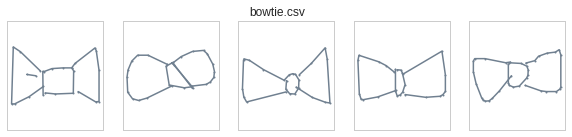

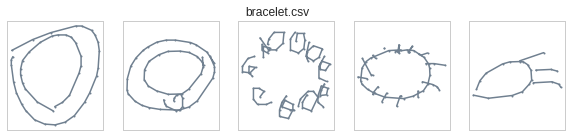

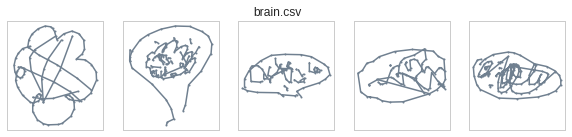

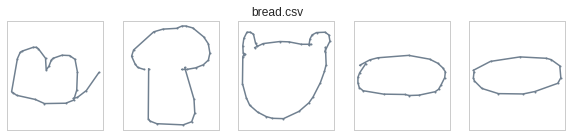

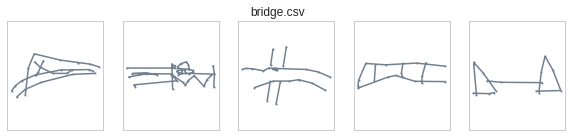

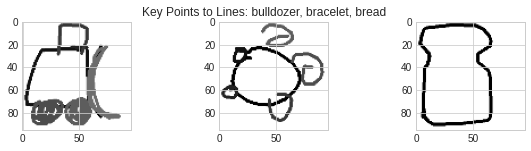

In [11]:
%data_compression 5